In [1]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Read the data

In [2]:
df_tweet = pd.read_csv(r"E:\BINAR\Gold - Challenge\DATASET\data.csv", encoding='ISO-8859-1')
df = pd.DataFrame(df_tweet[['Tweet']])
df

,Tweet
0,- disaat semua cowok berusaha melacak perhatia...
1,RT USER: USER siapa yang telat ngasih tau elu?...
2,"41. Kadang aku berfikir, kenapa aku tetap perc..."
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...
4,USER USER Kaum cebong kapir udah keliatan dong...
...,...
13164,USER jangan asal ngomong ndasmu. congor lu yg ...
13165,USER Kasur mana enak kunyuk'
13166,USER Hati hati bisu :( .g\n\nlagi bosan huft \...
13167,USER USER USER USER Bom yang real mudah terdet...


## Cleaning Tweety Data

In [3]:
#Function for cleaning
def Clean(Tweet):
    #lowercase for every word
    Tweet = Tweet.lower()

    #Clean Pattern
    #remove USER
    Tweet = re.sub(r'user|user:', ' ', Tweet)
    #remove 'RT'
    Tweet = re.sub(r'^rt[\s]+| rt', ' ', Tweet)
    #remove 'URL'
    Tweet = re.sub(r'^url[\s]+| url', ' ', Tweet)
    #remove HTTPS
    Tweet = re.sub(r'https\S+|https', ' ', Tweet)
    #remove HTTP
    Tweet = re.sub(r'http\S+|http', ' ', Tweet)

    #Clean_Unnecessary_Character
    #remove \n or every word afte '\' with space
    Tweet = re.sub(r'\\n|\\[a-zA-Z0-9]+', ' ', Tweet)
    #remove text emoji
    Tweet = re.sub(r'[^a-zA-Z0-9\s]{2,}|:[a-zA-Z0-9]{0,}', ' ', Tweet)
    #remove &amp
    Tweet = re.sub(r'&amp', ' ', Tweet)
    #remove unnecessary character 
    Tweet = re.sub(r'[^0-9a-zA-Z\s]+', ' ', Tweet)
    #remove extra space
    Tweet = re.sub(r'  +', ' ', Tweet)
    #remove space at the start or the end of string
    Tweet = re.sub(r'^ +| +$', '', Tweet)
    
    return Tweet

In [4]:
df['clean_Tweet'] = df['Tweet'].apply(Clean)
df.drop_duplicates(subset = 'clean_Tweet', keep = 'first', inplace = True)
df.head(20)

,Tweet,clean_Tweet
0,- disaat semua cowok berusaha melacak perhatia...,disaat semua cowok berusaha melacak perhatian ...
1,RT USER: USER siapa yang telat ngasih tau elu?...,siapa yang telat ngasih tau elu edan sarap gue...
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",41 kadang aku berfikir kenapa aku tetap percay...
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,aku itu aku ku tau matamu sipit tapi diliat da...
4,USER USER Kaum cebong kapir udah keliatan dong...,kaum cebong kapir udah keliatan dongoknya dari...
5,USER Ya bani taplak dkk \xf0\x9f\x98\x84\xf0\x...,ya bani taplak dkk
6,deklarasi pilkada 2018 aman dan anti hoax warg...,deklarasi pilkada 2018 aman dan anti hoax warg...
7,Gue baru aja kelar re-watch Aldnoah Zero!!! pa...,gue baru aja kelar re watch aldnoah zero palin...
8,Nah admin belanja satu lagi port terbaik nak m...,nah admin belanja satu lagi port terbaik nak m...
9,USER Enak lg klo smbil ngewe',enak lg klo smbil ngewe


## Visualization of word occurances

(-0.5, 399.5, 199.5, -0.5)

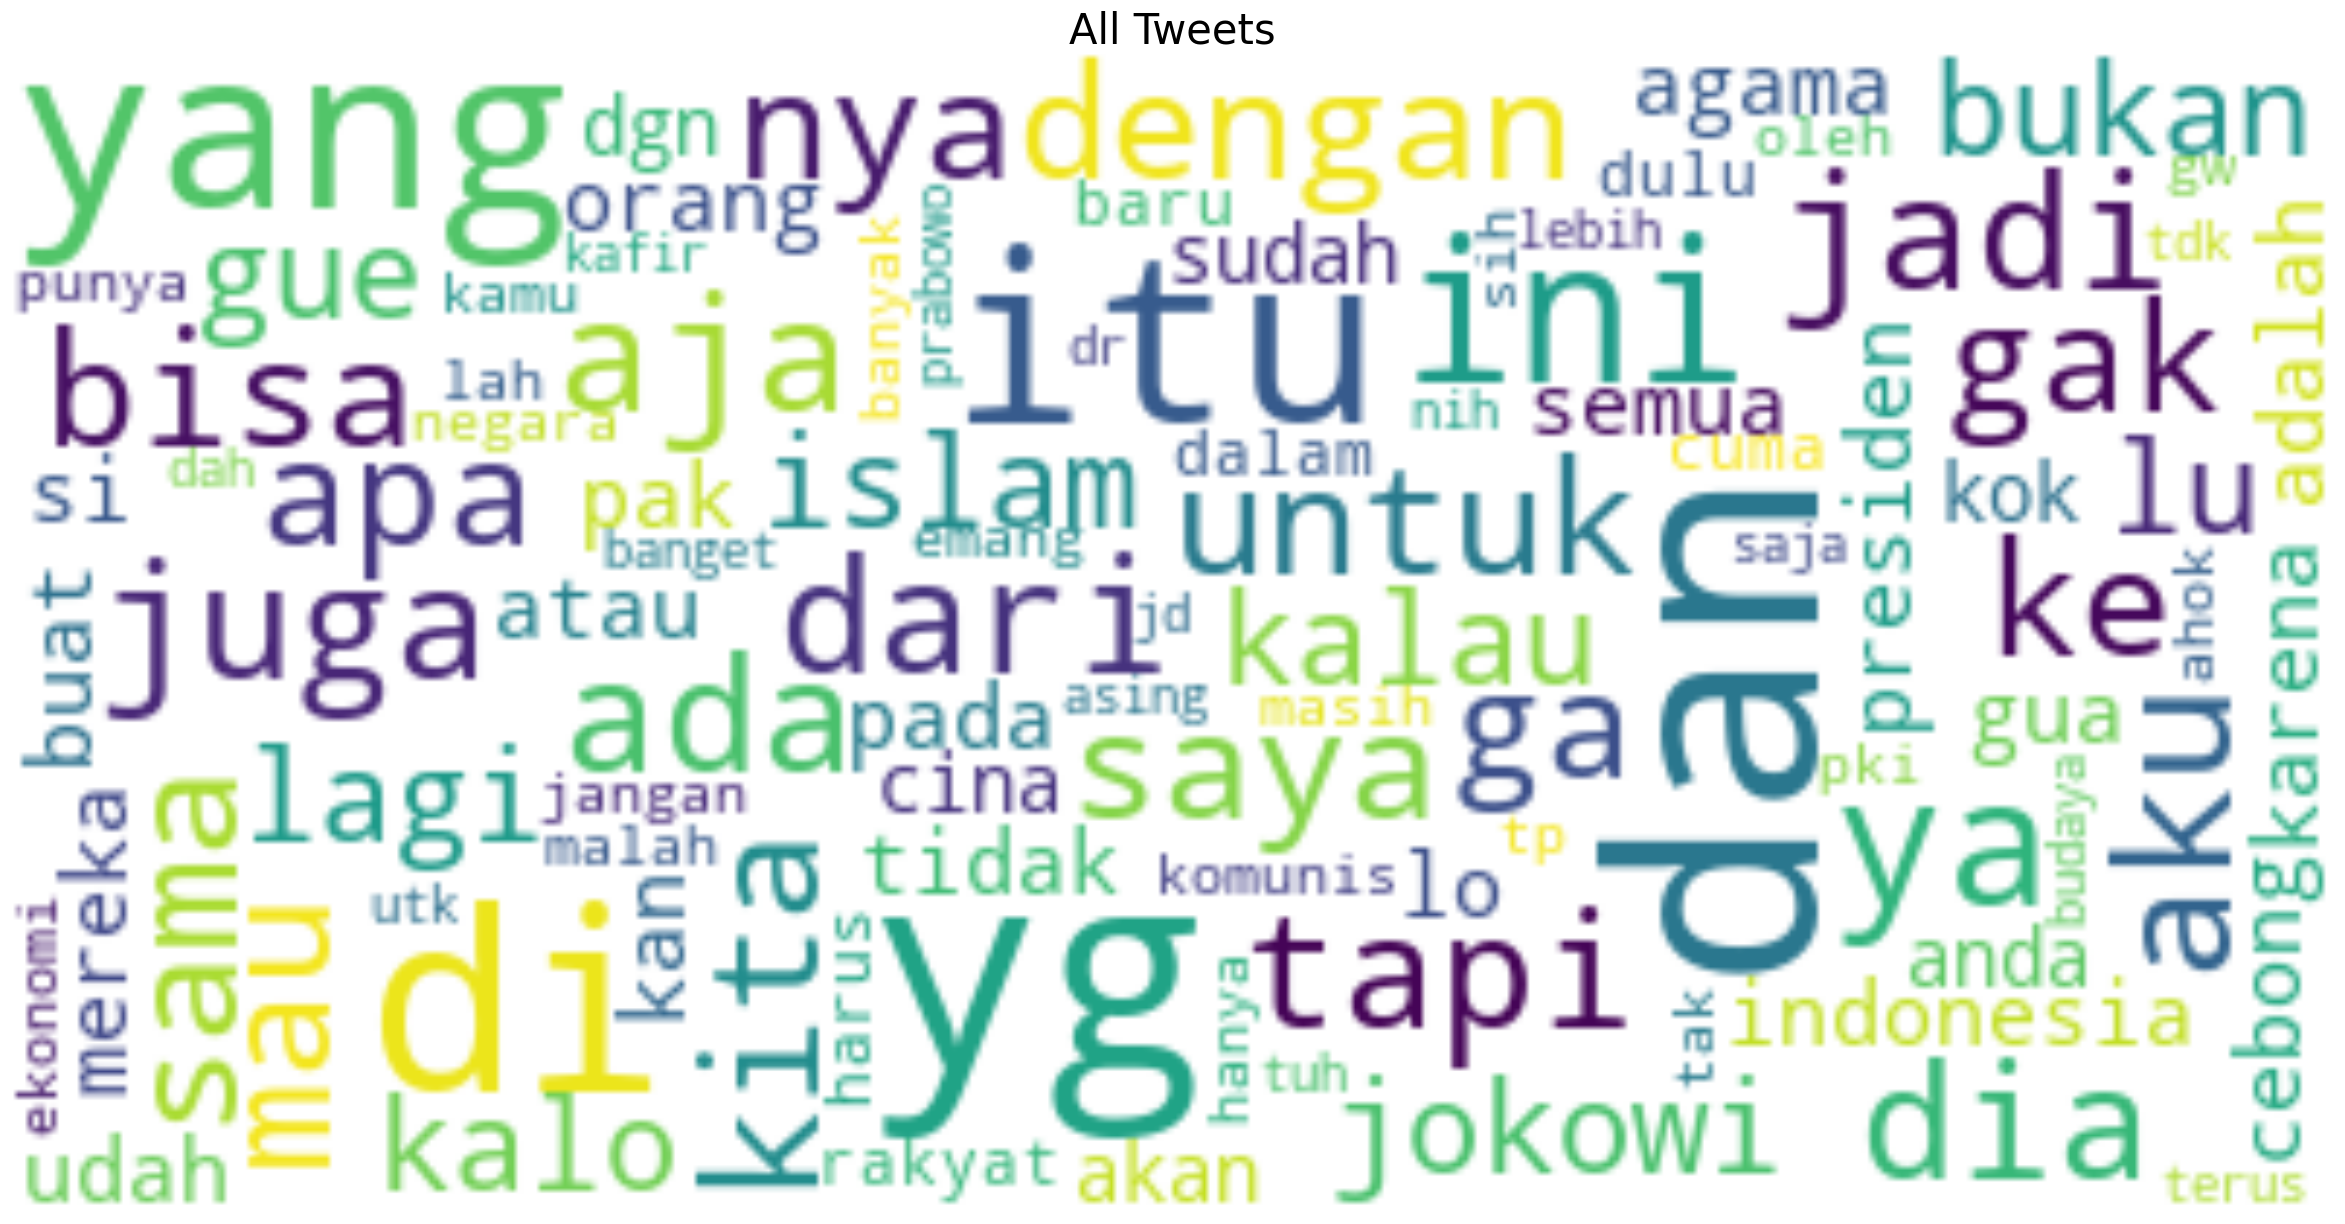

In [5]:
from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator
# Start with one review:
tweet_All = " ".join(review for review in df.clean_Tweet)

plt.subplots(1, 1, figsize  = (30,30))
# Create and generate a word cloud image:
wordcloud_ALL = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_All)

# Display the generated image:
plt.imshow(wordcloud_ALL, interpolation='bilinear')
plt.title('All Tweets', fontsize=30)
plt.axis('off')

## Tokenization

In [6]:
def tokenization(text):
    text = re.split('\W+', text)
    return text

df['Tweet_tokenized'] = df['clean_Tweet'].apply(tokenization)
df.head(20)

,Tweet,clean_Tweet,Tweet_tokenized
0,- disaat semua cowok berusaha melacak perhatia...,disaat semua cowok berusaha melacak perhatian ...,"[disaat, semua, cowok, berusaha, melacak, perh..."
1,RT USER: USER siapa yang telat ngasih tau elu?...,siapa yang telat ngasih tau elu edan sarap gue...,"[siapa, yang, telat, ngasih, tau, elu, edan, s..."
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",41 kadang aku berfikir kenapa aku tetap percay...,"[41, kadang, aku, berfikir, kenapa, aku, tetap..."
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,aku itu aku ku tau matamu sipit tapi diliat da...,"[aku, itu, aku, ku, tau, matamu, sipit, tapi, ..."
4,USER USER Kaum cebong kapir udah keliatan dong...,kaum cebong kapir udah keliatan dongoknya dari...,"[kaum, cebong, kapir, udah, keliatan, dongokny..."
5,USER Ya bani taplak dkk \xf0\x9f\x98\x84\xf0\x...,ya bani taplak dkk,"[ya, bani, taplak, dkk]"
6,deklarasi pilkada 2018 aman dan anti hoax warg...,deklarasi pilkada 2018 aman dan anti hoax warg...,"[deklarasi, pilkada, 2018, aman, dan, anti, ho..."
7,Gue baru aja kelar re-watch Aldnoah Zero!!! pa...,gue baru aja kelar re watch aldnoah zero palin...,"[gue, baru, aja, kelar, re, watch, aldnoah, ze..."
8,Nah admin belanja satu lagi port terbaik nak m...,nah admin belanja satu lagi port terbaik nak m...,"[nah, admin, belanja, satu, lagi, port, terbai..."
9,USER Enak lg klo smbil ngewe',enak lg klo smbil ngewe,"[enak, lg, klo, smbil, ngewe]"


### Tokenization into list

In [174]:
Tweet = df.clean_Tweet.to_list()

In [213]:
Tweet_split = []
for kalimat in Tweet:
    kalimat_split = kalimat.split()
    Tweet_split.append(kalimat_split)

for i in range(10):
    print(i)
    print(Tweet_split[i])

0
['di', 'saat', 'semua', 'cowok', 'berusaha', 'melacak', 'perhatian', 'gue', 'kamu', 'lantas', 'remehkan', 'perhatian', 'yang', 'gue', 'kasih', 'khusus', 'ke', 'kamu', 'basic', 'kamu', 'cowok', 'bego']
1
['siapa', 'yang', 'telat', 'memberi', 'tau', 'kamu', 'edan', 'sarap', 'gue', 'bergaul', 'dengan', 'cigax', 'jifla', 'calis', 'sama', 'siapa', 'itu', 'licew', 'juga']
2
['41', 'kadang', 'aku', 'berpikir', 'kenapa', 'aku', 'tetap', 'percaya', 'pada', 'tuhan', 'padahal', 'aku', 'selalu', 'jatuh', 'berkali', 'kali', 'kadang', 'aku', 'merasa', 'tuhan', 'itu', 'meninggalkan', 'aku', 'sendirian', 'ketika', 'orang', 'tuaku', 'berencana', 'berpisah', 'ketika', 'kakakku', 'lebih', 'memilih', 'jadi', 'kristen', 'ketika', 'aku', 'anak', 'ter']
3
['aku', 'itu', 'aku', 'ku', 'tau', 'matamu', 'sipit', 'tapi', 'dilihat', 'dari', 'mana', 'itu', 'aku']
4
['kaum', 'cebong', 'kafir', 'sudah', 'kelihatan', 'dongoknya', 'dari', 'awal', 'tambah', 'dungu', 'lagi', 'haha']
5
['ya', 'bani', 'taplak', 'dan', 'k

## Lemmatization using kamusalay

In [8]:
kamus_alay = pd.read_csv(r"E:\BINAR\new_kamusalay.csv", encoding = 'ISO-8859-1', header = None)
kamus_alay = kamus_alay.rename(columns={0: 'kata alay', 1: 'arti kata'})
kamus_alay.head(10)

,kata alay,arti kata
0,anakjakartaasikasik,anak jakarta asyik asyik
1,pakcikdahtua,pak cik sudah tua
2,pakcikmudalagi,pak cik muda lagi
3,t3tapjokowi,tetap jokowi
4,3x,tiga kali
5,aamiin,amin
6,aamiinn,amin
7,aamin,amin
8,aammiin,amin
9,abis,habis


In [9]:
#Create dictionary using words list from kamus_alay
kamus_alay_dict = dict(zip(kamus_alay['kata alay'], kamus_alay['arti kata']))
len(kamus_alay_dict)

15167

### Selecting the 'alay' word 

In [39]:
wn = list(kamus_alay_dict.values())
def lemmatization(text):
    text = [kamus_alay_dict[word] for word in text if word in kamus_alay_dict]
    return text

In [40]:
df['Tweet_edit_alay'] = df['Tweet_tokenized'].apply(lemmatization)
df.head()

,Tweet,clean_Tweet,Tweet_tokenized,Tweet_edit_alay
0,- disaat semua cowok berusaha melacak perhatia...,disaat semua cowok berusaha melacak perhatian ...,"[disaat, semua, cowok, berusaha, melacak, perh...","[di saat, kamu, yang, kamu, kamu]"
1,RT USER: USER siapa yang telat ngasih tau elu?...,siapa yang telat ngasih tau elu edan sarap gue...,"[siapa, yang, telat, ngasih, tau, elu, edan, s...","[memberi, kamu, itu]"
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",41 kadang aku berfikir kenapa aku tetap percay...,"[41, kadang, aku, berfikir, kenapa, aku, tetap...","[berpikir, meninggalkan, orang tuaku]"
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,aku itu aku ku tau matamu sipit tapi diliat da...,"[aku, itu, aku, ku, tau, matamu, sipit, tapi, ...",[dilihat]
4,USER USER Kaum cebong kapir udah keliatan dong...,kaum cebong kapir udah keliatan dongoknya dari...,"[kaum, cebong, kapir, udah, keliatan, dongokny...","[kafir, sudah, kelihatan, dungu, haha]"


### Edit the 'alay' word

In [41]:
def lemmatization(text):
    newlist = []
    for word in text:
        if word in kamus_alay_dict:
            text = kamus_alay_dict[word]
            newlist.append(text)
        else:
            text = word
            newlist.append(text)
    return newlist

In [42]:
df['Tweet_edit_alay'] = df['Tweet_tokenized'].apply(lemmatization)
df.head()

,Tweet,clean_Tweet,Tweet_tokenized,Tweet_edit_alay
0,- disaat semua cowok berusaha melacak perhatia...,disaat semua cowok berusaha melacak perhatian ...,"[disaat, semua, cowok, berusaha, melacak, perh...","[di saat, semua, cowok, berusaha, melacak, per..."
1,RT USER: USER siapa yang telat ngasih tau elu?...,siapa yang telat ngasih tau elu edan sarap gue...,"[siapa, yang, telat, ngasih, tau, elu, edan, s...","[siapa, yang, telat, memberi, tau, kamu, edan,..."
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",41 kadang aku berfikir kenapa aku tetap percay...,"[41, kadang, aku, berfikir, kenapa, aku, tetap...","[41, kadang, aku, berpikir, kenapa, aku, tetap..."
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,aku itu aku ku tau matamu sipit tapi diliat da...,"[aku, itu, aku, ku, tau, matamu, sipit, tapi, ...","[aku, itu, aku, ku, tau, matamu, sipit, tapi, ..."
4,USER USER Kaum cebong kapir udah keliatan dong...,kaum cebong kapir udah keliatan dongoknya dari...,"[kaum, cebong, kapir, udah, keliatan, dongokny...","[kaum, cebong, kafir, sudah, kelihatan, dongok..."


### Kamus Alay into List

In [211]:
for i in range(len(Tweet)):
    words = Tweet[i].split() # Pecah kalimat menjadi kata-kata
    for j in range(len(words)):
        if words[j] in kamus_alay_dict:
            words[j] = kamus_alay_dict[words[j]]
    Tweet[i] = ' '.join(words) # Gabungkan kata-kata menjadi kalimat
Tweet[:3]

['di saat semua cowok berusaha melacak perhatian gue kamu lantas remehkan perhatian yang gue kasih khusus ke kamu basic kamu cowok bego',
 'siapa yang telat memberi tau kamu edan sarap gue bergaul dengan cigax jifla calis sama siapa itu licew juga',
 '41 kadang aku berpikir kenapa aku tetap percaya pada tuhan padahal aku selalu jatuh berkali kali kadang aku merasa tuhan itu meninggalkan aku sendirian ketika orang tuaku berencana berpisah ketika kakakku lebih memilih jadi kristen ketika aku anak ter']

## Remove stopwords

source: Stopwords By : Tala from paper : A Study of Stemming Effects on Information Retrieval in Bahasa Indonesia Source : https://github.com/masdevid/ID-Stopwords

In [43]:
from nltk.tokenize import word_tokenize

In [44]:
f = open(r"E:\BINAR\tala-stopwords-indonesia.txt")
stopword_list = []
for line in f:
    stripped_line = line.strip()
    line_list = stripped_line.split()
    stopword_list.append(line_list[0])
f.close()

len(stopword_list)

758

In [45]:
def remove_stopwords(text):
    text = [word for word in text if word not in stopword_list]
    return text
    
df['Tweet_non_stopwords'] = df['Tweet_edit_alay'].apply(remove_stopwords)
df.head()

,Tweet,clean_Tweet,Tweet_tokenized,Tweet_edit_alay,Tweet_non_stopwords
0,- disaat semua cowok berusaha melacak perhatia...,disaat semua cowok berusaha melacak perhatian ...,"[disaat, semua, cowok, berusaha, melacak, perh...","[di saat, semua, cowok, berusaha, melacak, per...","[di saat, cowok, berusaha, melacak, perhatian,..."
1,RT USER: USER siapa yang telat ngasih tau elu?...,siapa yang telat ngasih tau elu edan sarap gue...,"[siapa, yang, telat, ngasih, tau, elu, edan, s...","[siapa, yang, telat, memberi, tau, kamu, edan,...","[telat, tau, edan, sarap, gue, bergaul, cigax,..."
2,"41. Kadang aku berfikir, kenapa aku tetap perc...",41 kadang aku berfikir kenapa aku tetap percay...,"[41, kadang, aku, berfikir, kenapa, aku, tetap...","[41, kadang, aku, berpikir, kenapa, aku, tetap...","[41, kadang, berpikir, percaya, tuhan, jatuh, ..."
3,USER USER AKU ITU AKU\n\nKU TAU MATAMU SIPIT T...,aku itu aku ku tau matamu sipit tapi diliat da...,"[aku, itu, aku, ku, tau, matamu, sipit, tapi, ...","[aku, itu, aku, ku, tau, matamu, sipit, tapi, ...","[ku, tau, matamu, sipit]"
4,USER USER Kaum cebong kapir udah keliatan dong...,kaum cebong kapir udah keliatan dongoknya dari...,"[kaum, cebong, kapir, udah, keliatan, dongokny...","[kaum, cebong, kafir, sudah, kelihatan, dongok...","[kaum, cebong, kafir, dongoknya, dungu, haha]"


## Visualization for comparison 3 different output data 

In [ ]:
tweet_All = " ".join(review for review in df.Tweet)
tweet_ADR = " ".join(review for review in df_ADR.Tweet)
tweet_NADR = " ".join(review for review in df_NADR.Tweet)

fig, ax = plt.subplots(3, 1, figsize  = (30,30))
# Create and generate a word cloud image:
wordcloud_ALL = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_All)
wordcloud_ADR = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_ADR)
wordcloud_NADR = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_NADR)

# Display the generated image:
ax[0].imshow(wordcloud_ALL, interpolation='bilinear')
ax[0].set_title('All Tweets', fontsize=30)
ax[0].axis('off')
ax[1].imshow(wordcloud_ADR, interpolation='bilinear')
ax[1].set_title('Tweets under ADR Class',fontsize=30)
ax[1].axis('off')
ax[2].imshow(wordcloud_NADR, interpolation='bilinear')
ax[2].set_title('Tweets under None - ADR Class',fontsize=30)
ax[2].axis('off')

In [190]:
tokens = ['apa', 'yang', 'dimakan', 'oleh', 'bambang', 'apakah', 'mengapa']

In [191]:
tokens_without_sw = [word for word in tokens if not word in stopword_list]
print("After stopwords removed")
print(tokens_without_sw)

After stopwords removed
['dimakan', 'bambang']


In [ ]:
Tweet_split = []
for kalimat in Tweet:
    kalimat_split = kalimat.split()
    Tweet_split.append(kalimat_split)

for i in range():
    print(i)
    print(Tweet_split[i])
    print('\n')